<a href="https://colab.research.google.com/github/Yoyosalah/cv_workshop/blob/main/cv_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data();

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

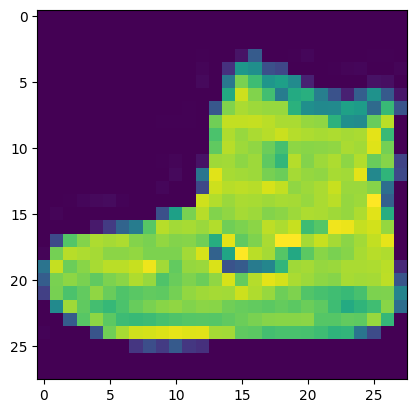

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train_scaled = X_train.astype(np.float32)/255.0
X_test_scaled = X_test.astype(np.float32)/255.0

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
def create_model():
  model = models.Sequential([
  layers.Conv2D(32,(3,3),activation = "relu",input_shape = (28,28,1)),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(16,(3,3),activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Flatten(),
  layers.Dense(32,activation="relu"),
  layers.Dense(10,activation="softmax")
  ])

  return model

In [ ]:
model = create_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,106 (70.73 KB)

 Trainable params: 18,106 (70.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics = ['accuracy'])
history = model.fit(x=X_train,y=y_train,validation_split=0.167,epochs=10,verbose=True,batch_size=32)

Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8271 - loss: 0.4843 - val_accuracy: 0.8421 - val_loss: 0.4271
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8611 - loss: 0.3776 - val_accuracy: 0.8620 - val_loss: 0.3716
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8782 - loss: 0.3283 - val_accuracy: 0.8576 - val_loss: 0.3914
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8865 - loss: 0.3053 - val_accuracy: 0.8711 - val_loss: 0.3552
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8926 - loss: 0.2850 - val_accuracy: 0.8810 - val_loss: 0.3229
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8970 - loss: 0.2718 - val_accuracy: 0.8845 - val_loss: 0.3233
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9001 - loss: 0.2634 - val_accuracy: 0.8866 - val_loss: 0.3284
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9034 -

In [ ]:
history.history.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Text(0, 0.5, 'Accuracy')

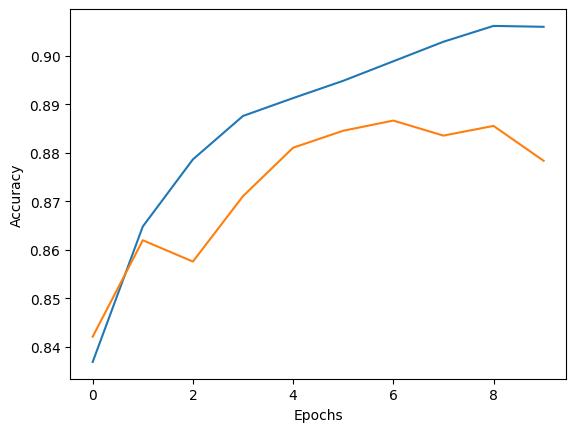

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
y_hat = model.predict(X_test_scaled,batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
